## Slow and Fast Pointer 
The Fast & Slow pointer approach, also known as the Hare & Tortoise algorithm, is a pointer algorithm that uses two pointers which move through the array (or sequence/LinkedList) at different speeds. This approach is quite useful when dealing with cyclic LinkedLists or arrays.

By moving at different speeds (say, in a cyclic LinkedList), the algorithm proves that the two pointers are bound to meet. The fast pointer should catch the slow pointer once both the pointers are in a cyclic loop.

#### Problem based on this pattern in leetcode:
1. Linked list cycle (141)
2. Linked list cycle II (142)
3. Middle of the linked list (876)
4. Palindrom Linked list II (234)
5. Happy number (202)
6. Remove nth node from end of list (19)
7. Remove Duplicate from sorted list II (82)
9. Reorder list (143)

### Linked List Cycle
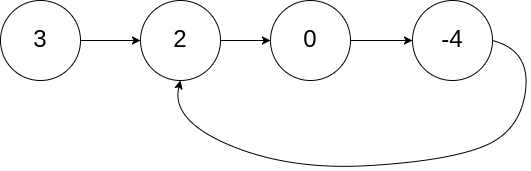



In [ ]:
class ListNode:
    def __init__(self,data):
        self.val = data
        self.next = None
        
class Solution:
    def hasCycle(self, head: Optional[ListNode]) -> bool:
        if not head:
            return False
        slow , fast = head,head
        while fast and fast.next:           
            slow = slow.next
            fast = fast.next.next
            if slow == fast:
                return True
        return False
        

### Linked List Cycle II

Given the head of a linked list, return the node where the cycle begins. If there is no cycle, return null.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to (0-indexed). It is -1 if there is no cycle. Note that pos is not passed as a parameter.

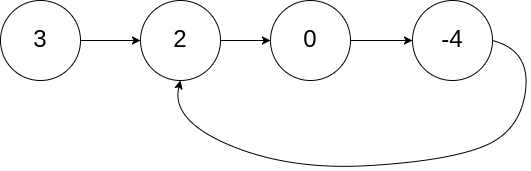



In [3]:
# Definition for singly-linked list.
from typing import Optional
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def detectCycle(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head:
            return None
        slow , fast = head , head
        
        while fast and fast.next:
            slow = slow.next 
            fast = fast.next.next
          

            if slow == fast:
                slow = head
                while slow != fast:
                    slow= slow.next
                    fast = fast.next
                return slow
        return None


### Middle of the Linked List

Given the head of a singly linked list, return the middle node of the linked list. If there are two middle nodes, return the second middle node.

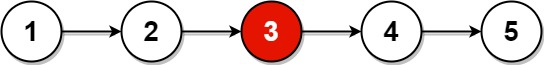


In [ ]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def middleNode(self, head: Optional[ListNode]) -> Optional[ListNode]:
        slow , fast = head, head
        while fast and fast.next:
            slow= slow.next
            fast= fast.next.next
        return slow

### Palindrom Linked List 

Given the head of a singly linked list, return true if it is a palindrome or false otherwise

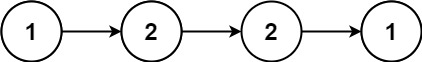


In [ ]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def isPalindrome(self, head: Optional[ListNode]) -> bool:
        slow, fast = head, head
        while fast and fast.next:
            slow= slow.next
            fast= fast.next.next
            
        # reverse the string from ri2nd half of the list
        prev= None
        while slow:
            tmp = slow.next
            slow.next = prev
            prev=slow
            slow=tmp

        # checking palindrom 
        left , right = head, prev
        while right:
            if left.val != right.val :
                return False
            left = left.next
            right = right.next
        return True
        

### Happy Number

Write an algorithm to determine if a number n is happy.

A happy number is a number defined by the following process:

Starting with any positive integer, replace the number by the sum of the squares of its digits.
Repeat the process until the number equals 1 (where it will stay), or it loops endlessly in a cycle which does not include 1.
Those numbers for which this process ends in 1 are happy.
Return true if n is a happy number, and false if not.




In [4]:
class Solution:
    def isHappy(self, n: int) -> bool:
        
        while(len(str(n)) > 1):
            n=sum([int(x)**2 for x in list(str(n))])

        if n ==1 or n==7:
            return True
        else:
            return False

### Remove nth node from end of list

Given the head of a linked list, remove the nth node from the end of the list and return its head.

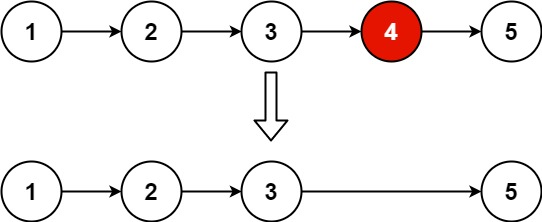

In [ ]:
class Solution:
    def removeNthFromEnd(self, head: Optional[ListNode], n: int) -> Optional[ListNode]:
        dummy = ListNode(0)
        dummy.next = head
        first = dummy
        second = dummy

        for _ in range(n + 1):
            first = first.next

        while first is not None:
            first = first.next
            second = second.next

        second.next = second.next.next

        return dummy.next

### Remove Duplicate from sorted list II

Given the head of a sorted linked list, delete all nodes that have duplicate numbers, leaving only distinct numbers from the original list. Return the linked list sorted as well.

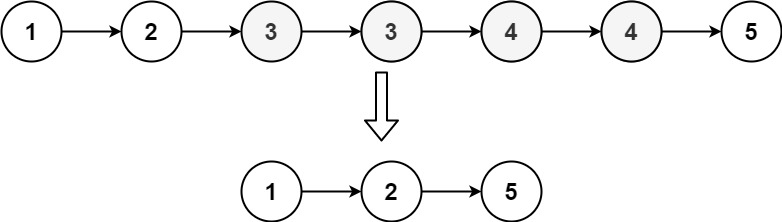

In [ ]:
class Solution:
    def deleteDuplicates(self, head: Optional[ListNode]) -> Optional[ListNode]:
        # Base Case
        if not head: return None
        
        # Dummy Node
        dummy = ListNode(0, head)

        # dup's initial value is a value that 
        # a node cannot have in this problem
        prev, cur = dummy, head
        dup = -101
        while cur.next:
            # If a duplicate is found, save that value
            if cur.val == cur.next.val:
                dup = cur.val
            
            # If the current node's value is dup
            # Remove the current node
            if cur.val == dup:
                prev.next = cur.next

            # If not just update prev to its next node                
            else:
                prev = prev.next

            cur = cur.next

        # Check the last node
        if cur.val == dup:
            prev.next = None
        
        return dummy.next
            